# Context
Phase three of this project is data cleanup and dimensionality reduction.\
This notebook drives this process for the data that went through the
transformations in PH2.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../project.env")
sys.path.append(os.environ["PYTHONPATH"])

import pickle

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import PH3header as ph3

Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes exists. Continuing with execution


In [3]:
PH3_IS_W2 = False

if PH3_IS_W2:
  prePH3_ROOT = sup.PH2_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_W2_CODE)
else:
  prePH3_ROOT = sup.PH1_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_WO2_CODE)

sup.report_dir_if_not_exists(prePH3_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_DATA_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_BINGEN_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_MEDIAGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH1/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2 does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2 does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2 does not exist. Creating it and continuing withexecution


# Source dataframe loading

In [4]:
import pandas as pd

## Active hand detection

In [5]:
prePH3_ah_frame_df = pd.read_csv(os.path.join(prePH3_ROOT, f"{sup.DATA_AH_PF}.csv"))
prePH3_ah_frame_df

person_id  cycle_num  handedness class_name  class_numeric  \
0          p01          1           0          a              0   
1          p01          1           0          a              0   
2          p01          1           0          a              0   
3          p01          1           0          a              0   
4          p01          1           0          a              0   
...        ...        ...         ...        ...            ...   
5001       p11          5           1          b              1   
5002       p11          5           1          b              1   
5003       p11          5           1          b              1   
5004       p11          5           1          b              1   
5005       p11          5           1          b              1   

                                                 fileid  current_frame  \
0         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              0   
1         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              0   
2         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              1   
3         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              1   
4         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              2   
...                                                 ...            ...   
5001  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4              9   
5002  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4             10   
5003  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4             10   
5004  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4             11   
5005  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4             11   

           h0x       h0y           h0z  ...       p0x       p0y       p0z  \
0     0.356595  0.485021 -1.312914e-07  ...  0.509847  0.324974 -0.511315   
1     0.567594  0.906298  4.943682e-09  ...  0.509847  0.324974 -0.511315   
2     0.352816  0.484037 -1.180915e-07  ...  0.513431  0.326082 -0.519151   
3     0.567833  0.905873  4.337321e-09  ...  0.513431  0.326082 -0.519151   
4     0.351332  0.480660 -1.254345e-07  ...  0.511904  0.326614 -0.538389   
...        ...       ...           ...  ...       ...       ...       ...   
5001  0.405674  0.764709  5.895547e-08  ...  0.485571  0.225081 -0.449431   
5002  0.633578  0.386601 -1.037258e-07  ...  0.484376  0.228379 -0.438624   
5003  0.404680  0.765115  4.365882e-08  ...  0.484376  0.228379 -0.438624   
5004  0.633556  0.386977 -1.034930e-07  ...  0.482275  0.226709 -0.417354   
5005  0.404066  0.765756  5.479360e-08  ...  0.482275  0.226709 -0.417354   

          p11x      p11y      p11z      p12x      p12y      p12z  active_hand  
0     0.582418  0.521928 -0.164979  0.419079  0.505322 -0.183779            1  
1     0.582418  0.521928 -0.164979  0.419079  0.505322 -0.183779            0  
2     0.579848  0.519345 -0.151877  0.419200  0.498523 -0.208451            1  
3     0.579848  0.519345 -0.151877  0.419200  0.498523 -0.208451            0  
4     0.582581  0.522652 -0.176160  0.420109  0.498809 -0.215022            1  
...        ...       ...       ...       ...       ...       ...          ...  
5001  0.574521  0.399775 -0.116570  0.403689  0.412528 -0.128586            0  
5002  0.573325  0.403236 -0.096671  0.400964  0.415107 -0.109301            1  
5003  0.573325  0.403236 -0.096671  0.400964  0.415107 -0.109301            0  
5004  0.574424  0.403286 -0.096126  0.401220  0.413737 -0.091982            1  
5005  0.574424  0.403286 -0.096126  0.401220  0.413737 -0.091982            0  

[5006 rows x 80 columns]

## Sign recognition

### Per frame

In [6]:
prePH3_s_frame_df = pd.read_csv(os.path.join(prePH3_ROOT, f"{sup.DATA_S_PF}.csv"))
prePH3_s_frame_df

person_id  cycle_num  handedness class_name  class_numeric  \
0          p01          1           0          a              0   
1          p01          1           0          a              0   
2          p01          1           0          a              0   
3          p01          1           0          a              0   
4          p01          1           0          a              0   
...        ...        ...         ...        ...            ...   
2551       p11          5           1          b              1   
2552       p11          5           1          b              1   
2553       p11          5           1          b              1   
2554       p11          5           1          b              1   
2555       p11          5           1          b              1   

                                                 fileid  current_frame  \
0         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              0   
1         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              1   
2         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              2   
3         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              3   
4         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              4   
...                                                 ...            ...   
2551  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4              7   
2552  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4              8   
2553  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4              9   
2554  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4             10   
2555  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4             11   

           h0x       h0y           h0z  ...      h20z       p0x       p0y  \
0     0.356595  0.485021 -1.312914e-07  ... -0.002761  0.509847  0.324974   
1     0.352816  0.484037 -1.180915e-07  ... -0.002850  0.513431  0.326082   
2     0.351332  0.480660 -1.254345e-07  ... -0.003898  0.511904  0.326614   
3     0.350582  0.477399 -1.209936e-07  ... -0.004673  0.511146  0.324653   
4     0.349610  0.477152 -1.138834e-07  ... -0.004360  0.513160  0.330011   
...        ...       ...           ...  ...       ...       ...       ...   
2551  0.634376  0.382406 -6.676932e-08  ... -0.011062  0.487095  0.224240   
2552  0.635004  0.385360 -7.754188e-08  ... -0.011773  0.486833  0.225193   
2553  0.634422  0.384731 -9.586294e-08  ... -0.011464  0.485571  0.225081   
2554  0.633578  0.386601 -1.037258e-07  ... -0.012498  0.484376  0.228379   
2555  0.633556  0.386977 -1.034930e-07  ... -0.012187  0.482275  0.226709   

           p0z      p11x      p11y      p11z      p12x      p12y      p12z  
0    -0.511315  0.582418  0.521928 -0.164979  0.419079  0.505322 -0.183779  
1    -0.519151  0.579848  0.519345 -0.151877  0.419200  0.498523 -0.208451  
2    -0.538389  0.582581  0.522652 -0.176160  0.420109  0.498809 -0.215022  
3    -0.543441  0.580992  0.523306 -0.178667  0.421722  0.496027 -0.223688  
4    -0.510589  0.580729  0.525749 -0.150138  0.420450  0.504078 -0.184120  
...        ...       ...       ...       ...       ...       ...       ...  
2551 -0.451780  0.574954  0.401786 -0.123889  0.404117  0.410934 -0.111879  
2552 -0.428193  0.575367  0.402983 -0.103338  0.404408  0.412782 -0.091784  
2553 -0.449431  0.574521  0.399775 -0.116570  0.403689  0.412528 -0.128586  
2554 -0.438624  0.573325  0.403236 -0.096671  0.400964  0.415107 -0.109301  
2555 -0.417354  0.574424  0.403286 -0.096126  0.401220  0.413737 -0.091982  

[2556 rows x 79 columns]

### Per video

In [7]:
prePH3_s_video_df = pd.read_csv(os.path.join(prePH3_ROOT, f"{sup.DATA_S_PV}.csv"))
prePH3_s_video_df

person_id  cycle_num  handedness class_name  class_numeric    f0_h0x  \
0         p01          1           0          a              0  0.356595   
1         p01          1           0          b              1  0.348771   
2         p01          1           1          a              0  0.475774   
3         p01          1           1          b              1  0.673130   
4         p01          2           0          a              0  0.356703   
..        ...        ...         ...        ...            ...       ...   
208       p11          4           1          b              1  0.645514   
209       p11          5           0          a              0  0.352055   
210       p11          5           0          b              1  0.365258   
211       p11          5           1          a              0  0.644268   
212       p11          5           1          b              1  0.637852   

       f0_h0y        f0_h0z    f0_h1x    f0_h1y  ...  f11_h20z   f11_p0x  \
0    0.485021 -1.312914e-07  0.373518  0.459913  ...  0.000712  0.513618   
1    0.466237  4.743118e-08  0.363611  0.446080  ... -0.009232  0.513528   
2    0.927311 -9.812992e-08  0.494941  0.935337  ... -0.005570  0.489232   
3    0.452971 -6.348814e-09  0.662367  0.436210  ...  0.004865  0.477038   
4    0.455645 -1.280792e-07  0.373605  0.434001  ... -0.001645  0.505790   
..        ...           ...       ...       ...  ...       ...       ...   
208  0.291388 -1.497878e-07  0.628773  0.270614  ... -0.004285  0.497029   
209  0.521995 -5.147281e-08  0.371064  0.510372  ... -0.011197  0.476834   
210  0.335842 -5.006000e-08  0.385060  0.323807  ... -0.015492  0.484834   
211  0.334418 -1.884289e-07  0.624991  0.314313  ... -0.001607  0.484898   
212  0.365312 -1.264185e-07  0.619819  0.349898  ... -0.012187  0.482275   

      f11_p0y   f11_p0z  f11_p11x  f11_p11y  f11_p11z  f11_p12x  f11_p12y  \
0    0.329477 -0.509254  0.587519  0.527019 -0.149709  0.425322  0.497731   
1    0.320183 -0.516217  0.585881  0.525961 -0.175390  0.422400  0.499646   
2    0.332752 -0.768854  0.573585  0.491954 -0.368677  0.400048  0.538888   
3    0.329535 -0.724772  0.572456  0.499061 -0.355822  0.396333  0.538750   
4    0.328168 -0.510567  0.585073  0.526921 -0.162060  0.420092  0.496173   
..        ...       ...       ...       ...       ...       ...       ...   
208  0.178938 -0.321385  0.578110  0.349044 -0.055098  0.406686  0.370372   
209  0.193496 -0.210986  0.574185  0.363997  0.093915  0.400514  0.367275   
210  0.194117 -0.179015  0.579442  0.370878  0.104476  0.407891  0.372225   
211  0.196024 -0.487740  0.579202  0.366986 -0.131724  0.406939  0.388264   
212  0.226709 -0.417354  0.574424  0.403286 -0.096126  0.401220  0.413737   

     f11_p12z  
0   -0.168903  
1   -0.196429  
2   -0.429950  
3   -0.390981  
4   -0.172387  
..        ...  
208 -0.046639  
209  0.079185  
210  0.081452  
211 -0.146042  
212 -0.091982  

[213 rows x 869 columns]

# Cleanup

## Drop unnecessary columns

### Active hand detection

In [8]:
if PH3_IS_W2:
  ah_pf_dataCols = sup.pf_wrist_hand_landmark_columns+sup.pf_chest_pose_landmark_columns+sup.pf_h_v123_columns
else:
  ah_pf_dataCols = sup.pf_hand_landmark_columns+sup.pf_pose_landmark_columns

In [9]:
PH3_AH_FRM_clean_df = prePH3_ah_frame_df[[sup.active_hand_col]+ah_pf_dataCols]
PH3_AH_FRM_clean_df

active_hand       h0x       h0y           h0z       h1x       h1y  \
0               1  0.356595  0.485021 -1.312914e-07  0.373518  0.459913   
1               0  0.567594  0.906298  4.943682e-09  0.547834  0.921491   
2               1  0.352816  0.484037 -1.180915e-07  0.371313  0.459922   
3               0  0.567833  0.905873  4.337321e-09  0.548048  0.921183   
4               1  0.351332  0.480660 -1.254345e-07  0.370044  0.457751   
...           ...       ...       ...           ...       ...       ...   
5001            0  0.405674  0.764709  5.895547e-08  0.425558  0.766119   
5002            1  0.633578  0.386601 -1.037258e-07  0.622075  0.367016   
5003            0  0.404680  0.765115  4.365882e-08  0.424475  0.764827   
5004            1  0.633556  0.386977 -1.034930e-07  0.622492  0.367370   
5005            0  0.404066  0.765756  5.479360e-08  0.424230  0.765425   

           h1z       h2x       h2y       h2z  ...      h20z       p0x  \
0    -0.003802  0.382574  0.427299 -0.005120  ... -0.002761  0.509847   
1    -0.002715  0.536150  0.951478 -0.004419  ... -0.011593  0.509847   
2    -0.003602  0.381156  0.427376 -0.004734  ... -0.002850  0.513431   
3    -0.002559  0.536497  0.951170 -0.004229  ... -0.011505  0.513431   
4    -0.003379  0.380355  0.425711 -0.004444  ... -0.003898  0.511904   
...        ...       ...       ...       ...  ...       ...       ...   
5001 -0.006012  0.443012  0.783180 -0.014492  ... -0.025703  0.485571   
5002 -0.008620  0.615695  0.336702 -0.012277  ... -0.012498  0.484376   
5003 -0.005375  0.442553  0.783184 -0.012920  ... -0.025550  0.484376   
5004 -0.008902  0.616215  0.336357 -0.012468  ... -0.012187  0.482275   
5005 -0.006206  0.442558  0.783138 -0.014571  ... -0.027141  0.482275   

           p0y       p0z      p11x      p11y      p11z      p12x      p12y  \
0     0.324974 -0.511315  0.582418  0.521928 -0.164979  0.419079  0.505322   
1     0.324974 -0.511315  0.582418  0.521928 -0.164979  0.419079  0.505322   
2     0.326082 -0.519151  0.579848  0.519345 -0.151877  0.419200  0.498523   
3     0.326082 -0.519151  0.579848  0.519345 -0.151877  0.419200  0.498523   
4     0.326614 -0.538389  0.582581  0.522652 -0.176160  0.420109  0.498809   
...        ...       ...       ...       ...       ...       ...       ...   
5001  0.225081 -0.449431  0.574521  0.399775 -0.116570  0.403689  0.412528   
5002  0.228379 -0.438624  0.573325  0.403236 -0.096671  0.400964  0.415107   
5003  0.228379 -0.438624  0.573325  0.403236 -0.096671  0.400964  0.415107   
5004  0.226709 -0.417354  0.574424  0.403286 -0.096126  0.401220  0.413737   
5005  0.226709 -0.417354  0.574424  0.403286 -0.096126  0.401220  0.413737   

          p12z  
0    -0.183779  
1    -0.183779  
2    -0.208451  
3    -0.208451  
4    -0.215022  
...        ...  
5001 -0.128586  
5002 -0.109301  
5003 -0.109301  
5004 -0.091982  
5005 -0.091982  

[5006 rows x 73 columns]

### Sign recognition

#### Per frame

In [10]:
if PH3_IS_W2:
  s_pf_dataCols = sup.pf_wrist_hand_landmark_columns+sup.pf_chest_pose_landmark_columns+sup.pf_h_v123_columns
else:
  s_pf_dataCols = sup.pf_hand_landmark_columns+sup.pf_pose_landmark_columns

In [11]:
PH3_S_FRM_clean_df = prePH3_s_frame_df[[sup.class_numeric_column]+s_pf_dataCols]
PH3_S_FRM_clean_df

class_numeric       h0x       h0y           h0z       h1x       h1y  \
0                 0  0.356595  0.485021 -1.312914e-07  0.373518  0.459913   
1                 0  0.352816  0.484037 -1.180915e-07  0.371313  0.459922   
2                 0  0.351332  0.480660 -1.254345e-07  0.370044  0.457751   
3                 0  0.350582  0.477399 -1.209936e-07  0.369168  0.455255   
4                 0  0.349610  0.477152 -1.138834e-07  0.368888  0.456061   
...             ...       ...       ...           ...       ...       ...   
2551              1  0.634376  0.382406 -6.676932e-08  0.620655  0.362756   
2552              1  0.635004  0.385360 -7.754188e-08  0.621812  0.365404   
2553              1  0.634422  0.384731 -9.586294e-08  0.621981  0.365364   
2554              1  0.633578  0.386601 -1.037258e-07  0.622075  0.367016   
2555              1  0.633556  0.386977 -1.034930e-07  0.622492  0.367370   

           h1z       h2x       h2y       h2z  ...      h20z       p0x  \
0    -0.003802  0.382574  0.427299 -0.005120  ... -0.002761  0.509847   
1    -0.003602  0.381156  0.427376 -0.004734  ... -0.002850  0.513431   
2    -0.003379  0.380355  0.425711 -0.004444  ... -0.003898  0.511904   
3    -0.003217  0.379645  0.424855 -0.004526  ... -0.004673  0.511146   
4    -0.003413  0.379978  0.425646 -0.004610  ... -0.004360  0.513160   
...        ...       ...       ...       ...  ...       ...       ...   
2551 -0.010490  0.613629  0.335032 -0.014443  ... -0.011062  0.487095   
2552 -0.010291  0.614863  0.337302 -0.014465  ... -0.011773  0.486833   
2553 -0.008810  0.615419  0.336312 -0.012325  ... -0.011464  0.485571   
2554 -0.008620  0.615695  0.336702 -0.012277  ... -0.012498  0.484376   
2555 -0.008902  0.616215  0.336357 -0.012468  ... -0.012187  0.482275   

           p0y       p0z      p11x      p11y      p11z      p12x      p12y  \
0     0.324974 -0.511315  0.582418  0.521928 -0.164979  0.419079  0.505322   
1     0.326082 -0.519151  0.579848  0.519345 -0.151877  0.419200  0.498523   
2     0.326614 -0.538389  0.582581  0.522652 -0.176160  0.420109  0.498809   
3     0.324653 -0.543441  0.580992  0.523306 -0.178667  0.421722  0.496027   
4     0.330011 -0.510589  0.580729  0.525749 -0.150138  0.420450  0.504078   
...        ...       ...       ...       ...       ...       ...       ...   
2551  0.224240 -0.451780  0.574954  0.401786 -0.123889  0.404117  0.410934   
2552  0.225193 -0.428193  0.575367  0.402983 -0.103338  0.404408  0.412782   
2553  0.225081 -0.449431  0.574521  0.399775 -0.116570  0.403689  0.412528   
2554  0.228379 -0.438624  0.573325  0.403236 -0.096671  0.400964  0.415107   
2555  0.226709 -0.417354  0.574424  0.403286 -0.096126  0.401220  0.413737   

          p12z  
0    -0.183779  
1    -0.208451  
2    -0.215022  
3    -0.223688  
4    -0.184120  
...        ...  
2551 -0.111879  
2552 -0.091784  
2553 -0.128586  
2554 -0.109301  
2555 -0.091982  

[2556 rows x 73 columns]

#### Per video

In [12]:
if PH3_IS_W2:
  s_pv_dataCols = sup.pv_wrist_hand_landmark_columns+sup.pv_chest_pose_landmark_columns+sup.pv_h_v123_columns
else:
  s_pv_dataCols = sup.pv_hand_landmark_columns+sup.pv_pose_landmark_columns

In [13]:
PH3_S_VID_clean_df = prePH3_s_video_df[[sup.class_numeric_column]+s_pv_dataCols]
PH3_S_VID_clean_df

class_numeric    f0_h0x    f0_h0y        f0_h0z    f0_h1x    f0_h1y  \
0                0  0.356595  0.485021 -1.312914e-07  0.373518  0.459913   
1                1  0.348771  0.466237  4.743118e-08  0.363611  0.446080   
2                0  0.475774  0.927311 -9.812992e-08  0.494941  0.935337   
3                1  0.673130  0.452971 -6.348814e-09  0.662367  0.436210   
4                0  0.356703  0.455645 -1.280792e-07  0.373605  0.434001   
..             ...       ...       ...           ...       ...       ...   
208              1  0.645514  0.291388 -1.497878e-07  0.628773  0.270614   
209              0  0.352055  0.521995 -5.147281e-08  0.371064  0.510372   
210              1  0.365258  0.335842 -5.006000e-08  0.385060  0.323807   
211              0  0.644268  0.334418 -1.884289e-07  0.624991  0.314313   
212              1  0.637852  0.365312 -1.264185e-07  0.619819  0.349898   

       f0_h1z    f0_h2x    f0_h2y    f0_h2z  ...  f10_p12z   f11_p0x  \
0   -0.003802  0.382574  0.427299 -0.005120  ... -0.181216  0.513618   
1   -0.004794  0.369070  0.412776 -0.004948  ... -0.174964  0.513528   
2    0.002976  0.506056  0.958528  0.002645  ... -0.453234  0.489232   
3   -0.011240  0.654491  0.409298 -0.016136  ... -0.407527  0.477038   
4   -0.003840  0.384985  0.405219 -0.005079  ... -0.191310  0.505790   
..        ...       ...       ...       ...  ...       ...       ...   
208 -0.006013  0.614850  0.243209 -0.009983  ... -0.060309  0.497029   
209 -0.007648  0.383717  0.493164 -0.013917  ...  0.051888  0.476834   
210 -0.006881  0.399298  0.302045 -0.009769  ...  0.116572  0.484834   
211 -0.005429  0.611459  0.286023 -0.008327  ... -0.124706  0.484898   
212 -0.005666  0.607273  0.325690 -0.008450  ... -0.109301  0.482275   

      f11_p0y   f11_p0z  f11_p11x  f11_p11y  f11_p11z  f11_p12x  f11_p12y  \
0    0.329477 -0.509254  0.587519  0.527019 -0.149709  0.425322  0.497731   
1    0.320183 -0.516217  0.585881  0.525961 -0.175390  0.422400  0.499646   
2    0.332752 -0.768854  0.573585  0.491954 -0.368677  0.400048  0.538888   
3    0.329535 -0.724772  0.572456  0.499061 -0.355822  0.396333  0.538750   
4    0.328168 -0.510567  0.585073  0.526921 -0.162060  0.420092  0.496173   
..        ...       ...       ...       ...       ...       ...       ...   
208  0.178938 -0.321385  0.578110  0.349044 -0.055098  0.406686  0.370372   
209  0.193496 -0.210986  0.574185  0.363997  0.093915  0.400514  0.367275   
210  0.194117 -0.179015  0.579442  0.370878  0.104476  0.407891  0.372225   
211  0.196024 -0.487740  0.579202  0.366986 -0.131724  0.406939  0.388264   
212  0.226709 -0.417354  0.574424  0.403286 -0.096126  0.401220  0.413737   

     f11_p12z  
0   -0.168903  
1   -0.196429  
2   -0.429950  
3   -0.390981  
4   -0.172387  
..        ...  
208 -0.046639  
209  0.079185  
210  0.081452  
211 -0.146042  
212 -0.091982  

[213 rows x 865 columns]

## Standardize data

In [14]:
from sklearn.preprocessing import StandardScaler

### Active hand detection

In [15]:
ah_pf_scaler = StandardScaler()

PH3_AH_FRM_std_df = PH3_AH_FRM_clean_df[[sup.active_hand_col]]
PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(PH3_AH_FRM_clean_df[ah_pf_dataCols])

PH3_AH_FRM_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12699/3356107724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(PH3_AH_FRM_clean_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12699/3356107724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(PH3_AH_FRM_clean_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykern

active_hand       h0x       h0y       h0z       h1x       h1y       h1z  \
0               1 -1.360371 -0.571336 -1.385326 -1.409000 -0.650392  0.633135   
1               0  0.612763  1.572302  0.177694  0.499522  1.577426  0.907623   
2               1 -1.395718 -0.576343 -1.233884 -1.433148 -0.650347  0.683695   
3               0  0.614999  1.570140  0.170738  0.501866  1.575940  0.946889   
4               1 -1.409590 -0.593530 -1.318130 -1.447040 -0.660826  0.739968   
...           ...       ...       ...       ...       ...       ...       ...   
5001            0 -0.901423  0.851835  0.797370 -0.839242  0.827518  0.075529   
5002            1  1.229803 -1.072140 -1.069068  1.312364 -1.098764 -0.582876   
5003            0 -0.910709  0.853903  0.621872 -0.851093  0.821283  0.236256   
5004            1  1.229598 -1.070231 -1.066397  1.316933 -1.097055 -0.653866   
5005            0 -0.916458  0.857164  0.749621 -0.853778  0.824169  0.026411   

           h2x       h2y       h2z  ...      h20z       p0x       p0y  \
0    -1.479157 -0.726917  0.959762  ...  1.397673  0.562333  1.289459   
1     0.418362  1.555721  1.081068  ...  0.703737  0.562333  1.289459   
2    -1.496679 -0.726580  1.026560  ...  1.390647  0.699209  1.308137   
3     0.422648  1.554380  1.113986  ...  0.710645  0.699209  1.308137   
4    -1.506573 -0.733830  1.076750  ...  1.308352  0.640881  1.317126   
...        ...       ...       ...  ...       ...       ...       ...   
5001 -0.732403  0.822833 -0.662122  ... -0.404976 -0.364924 -0.395409   
5002  1.401198 -1.121437 -0.278775  ...  0.632606 -0.410554 -0.339784   
5003 -0.738082  0.822853 -0.390077  ... -0.392980 -0.410554 -0.339784   
5004  1.407612 -1.122938 -0.311796  ...  0.657032 -0.490810 -0.367955   
5005 -0.738022  0.822654 -0.675820  ... -0.517969 -0.490810 -0.367955   

           p0z      p11x      p11y      p11z      p12x      p12y      p12z  
0    -0.371511  0.146537  1.932786 -0.018014  0.175009  1.702988 -0.189110  
1    -0.371511  0.146537  1.932786 -0.018014  0.175009  1.702988 -0.189110  
2    -0.426191  0.061344  1.889948  0.098877  0.180396  1.578370 -0.383243  
3    -0.426191  0.061344  1.889948  0.098877  0.180396  1.578370 -0.383243  
4    -0.560435  0.151936  1.944789 -0.117762  0.220667  1.583620 -0.434952  
...        ...       ...       ...       ...       ...       ...       ...  
5001  0.060311 -0.115190 -0.092682  0.413863 -0.506813  0.002163  0.245185  
5002  0.135724 -0.154812 -0.035286  0.591383 -0.627535  0.049438  0.396934  
5003  0.135724 -0.154812 -0.035286  0.591383 -0.627535  0.049438  0.396934  
5004  0.284146 -0.118408 -0.034456  0.596246 -0.616188  0.024324  0.533210  
5005  0.284146 -0.118408 -0.034456  0.596246 -0.616188  0.024324  0.533210  

[5006 rows x 73 columns]

### Sign recognition

#### Per Frame

In [16]:
s_pf_scaler = StandardScaler()

PH3_S_FRM_std_df = PH3_S_FRM_clean_df[[sup.class_numeric_column]]
PH3_S_FRM_std_df[s_pf_dataCols] = s_pf_scaler.fit_transform(PH3_S_FRM_clean_df[s_pf_dataCols])

PH3_S_FRM_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12699/3017513967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_S_FRM_std_df[s_pf_dataCols] = s_pf_scaler.fit_transform(PH3_S_FRM_clean_df[s_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12699/3017513967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_S_FRM_std_df[s_pf_dataCols] = s_pf_scaler.fit_transform(PH3_S_FRM_clean_df[s_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12699/3

class_numeric       h0x       h0y       h0z       h1x       h1y  \
0                 0 -1.242250  0.440068 -1.037022 -1.266433  0.314510   
1                 0 -1.274132  0.431794 -0.882142 -1.287798  0.314584   
2                 0 -1.286644  0.403386 -0.968301 -1.300088  0.297155   
3                 0 -1.292970  0.375963 -0.916194 -1.308577  0.277113   
4                 0 -1.301175  0.373883 -0.832767 -1.311284  0.283585   
...             ...       ...       ...       ...       ...       ...   
2551              1  1.100787 -0.422960 -0.279957  1.127531 -0.465445   
2552              1  1.106083 -0.398112 -0.406356  1.138743 -0.444187   
2553              1  1.101179 -0.403406 -0.621325  1.140381 -0.444509   
2554              1  1.094056 -0.387675 -0.713584  1.141290 -0.431253   
2555              1  1.093871 -0.384519 -0.710852  1.145332 -0.428410   

           h1z       h2x       h2y       h2z  ...      h20z       p0x  \
0     1.017137 -1.313370  0.194273  1.276569  ...  1.494884  0.575026   
1     1.088648 -1.328677  0.194840  1.368518  ...  1.484440  0.711854   
2     1.168241 -1.337321  0.182632  1.437606  ...  1.362119  0.653547   
3     1.225998 -1.344981  0.176354  1.418059  ...  1.271615  0.624612   
4     1.156218 -1.341392  0.182153  1.397938  ...  1.308167  0.701504   
...        ...       ...       ...       ...  ...       ...       ...   
2551 -1.370090  1.180595 -0.482360 -0.944359  ...  0.525462 -0.293730   
2552 -1.299179  1.193915 -0.465717 -0.949588  ...  0.442422 -0.303716   
2553 -0.770605  1.199917 -0.472976 -0.439761  ...  0.478402 -0.351917   
2554 -0.702761  1.202904 -0.470116 -0.428311  ...  0.357717 -0.397532   
2555 -0.803167  1.208508 -0.472644 -0.473766  ...  0.394022 -0.477760   

           p0y       p0z      p11x      p11y      p11z      p12x      p12y  \
0     1.281754 -0.360273  0.163352  1.933001 -0.003600  0.183699  1.688328   
1     1.300477 -0.414439  0.078369  1.890050  0.112908  0.189105  1.564193   
2     1.309488 -0.547421  0.168737  1.945035 -0.103020  0.229520  1.569423   
3     1.276327 -0.582343  0.116212  1.955901 -0.125312  0.301220  1.518623   
4     1.366911 -0.355256  0.107501  1.996527  0.128373  0.244664  1.665614   
...        ...       ...       ...       ...       ...       ...       ...   
2551 -0.421405  0.051256 -0.083396 -0.064353  0.361773 -0.481526 -0.035017   
2552 -0.405294  0.214298 -0.069765 -0.044449  0.544517 -0.468591 -0.001271   
2553 -0.407197  0.067490 -0.097728 -0.097779  0.426859 -0.500568 -0.005905   
2554 -0.351438  0.142194 -0.137251 -0.040233  0.603797 -0.621722  0.041187   
2555 -0.379677  0.289221 -0.100937 -0.039400  0.608644 -0.610335  0.016171   

          p12z  
0    -0.175305  
1    -0.368026  
2    -0.419358  
3    -0.487045  
4    -0.177967  
...        ...  
2551  0.386341  
2552  0.543305  
2553  0.255831  
2554  0.406476  
2555  0.541761  

[2556 rows x 73 columns]

#### Per video

In [17]:
s_pv_scaler = StandardScaler()

PH3_S_VID_std_df = PH3_S_VID_clean_df[[sup.class_numeric_column]]
PH3_S_VID_std_df[s_pv_dataCols] = s_pv_scaler.fit_transform(PH3_S_VID_clean_df[s_pv_dataCols])

PH3_S_VID_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12699/2466599604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_S_VID_std_df[s_pv_dataCols] = s_pv_scaler.fit_transform(PH3_S_VID_clean_df[s_pv_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12699/2466599604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_S_VID_std_df[s_pv_dataCols] = s_pv_scaler.fit_transform(PH3_S_VID_clean_df[s_pv_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12699/2

class_numeric    f0_h0x    f0_h0y    f0_h0z    f0_h1x    f0_h1y  \
0                0 -1.235052  0.123598 -0.977954 -1.262424  0.021099   
1                1 -1.301802 -0.003886  1.037683 -1.359755 -0.067967   
2                0 -0.218287  3.125248 -0.603958 -0.069619  3.082102   
3                1  1.465445 -0.093917  0.431151  1.575098 -0.131516   
4                0 -1.234138 -0.075769 -0.941726 -1.261570 -0.145736   
..             ...       ...       ...       ...       ...       ...   
208              1  1.229838 -1.190515 -1.186557  1.245080 -1.197698   
209              0 -1.273786  0.374528 -0.077758 -1.286533  0.345976   
210              1 -1.161145 -0.888822 -0.061825 -1.149050 -0.855216   
211              0  1.219211 -0.898489 -1.622352  1.207928 -0.916340   
212              1  1.164475 -0.688821 -0.922997  1.157119 -0.687231   

       f0_h1z    f0_h2x    f0_h2y    f0_h2z  ...  f10_p12z   f11_p0x  \
0    0.768404 -1.311737 -0.079500  1.012284  ... -0.175753  0.715550   
1    0.458689 -1.459799 -0.164405  1.046526  ... -0.125620  0.712143   
2    2.885393  0.042176  3.026393  2.564087  ... -2.356978 -0.209273   
3   -1.554627  1.669689 -0.184742 -1.189391  ... -1.990473 -0.671723   
4    0.756525 -1.285300 -0.208593  1.020397  ... -0.256696  0.418672   
..        ...       ...       ...       ...  ...       ...       ...   
208  0.077967  1.235049 -1.155798  0.040389  ...  0.793755  0.086424   
209 -0.432681 -1.299201  0.305591 -0.745853  ...  1.693432 -0.679459   
210 -0.193099 -1.128369 -0.811808  0.083227  ...  2.212110 -0.376053   
211  0.260415  1.197873 -0.905484  0.371273  ...  0.277376 -0.373628   
212  0.186113  1.151972 -0.673567  0.346768  ...  0.400908 -0.473117   

      f11_p0y   f11_p0z  f11_p11x  f11_p11y  f11_p11z  f11_p12x  f11_p12y  \
0    1.346851 -0.372801  0.333144  2.010518  0.121141  0.452444  1.563176   
1    1.188905 -0.423137  0.279193  1.992922 -0.117081  0.322969  1.598418   
2    1.402498 -2.249496 -0.125678  1.427671 -1.909995 -0.667555  2.320797   
3    1.347835 -1.930818 -0.162831  1.545804 -1.790748 -0.832171  2.318261   
4    1.324604 -0.382291  0.252588  2.008880  0.006572  0.220693  1.534495   
..        ...       ...       ...       ...       ...       ...       ...   
208 -1.211264  0.985330  0.023330 -0.947776  0.998741 -0.373378 -0.781307   
209 -0.963881  1.783423 -0.105919 -0.699222  2.380972 -0.646895 -0.838326   
210 -0.953338  2.014548  0.067180 -0.584855  2.478932 -0.320002 -0.747196   
211 -0.920917 -0.217277  0.059289 -0.649541  0.287967 -0.362192 -0.451942   
212 -0.399503  0.291557 -0.098051 -0.046163  0.618165 -0.615633  0.016973   

     f11_p12z  
0   -0.072497  
1   -0.296552  
2   -2.197354  
3   -1.880159  
4   -0.100853  
..        ...  
208  0.922708  
209  1.946883  
210  1.965340  
211  0.113586  
212  0.553624  

[213 rows x 865 columns]

## Write out clean and standardized data

In [18]:
PH3_SUB2_DATA_ROOT = os.path.join(PH3_SUB_DATA_ROOT, sup.PH3_SCALED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_DATA_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/scale does not exist. Creating it and continuing withexecution


### Active hand detection

In [19]:
PH3_AH_FRM_std_df.to_csv(os.path.join(PH3_SUB2_DATA_ROOT, f"{sup.DATA_AH_PF}.csv"), index=False)

### Sign recognition

#### Per frame

In [20]:
PH3_S_FRM_std_df.to_csv(os.path.join(PH3_SUB2_DATA_ROOT, f"{sup.DATA_S_PF}.csv"), index=False)

#### Per video

In [21]:
PH3_S_VID_std_df.to_csv(os.path.join(PH3_SUB2_DATA_ROOT, f"{sup.DATA_S_PV}.csv"), index=False)

## Save standardizers

In [22]:
PH3_SUB2_BINGEN_ROOT = os.path.join(PH3_SUB_BINGEN_ROOT, sup.PH3_SCALED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_BINGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/scale does not exist. Creating it and continuing withexecution


### Active hand detection

In [23]:
with open(os.path.join(PH3_SUB2_BINGEN_ROOT, f"{sup.DATA_AH_PF}.pkl"), 'wb') as f:
  pickle.dump(ah_pf_scaler, f)

### Sign recognition

### Per frame

In [24]:
with open(os.path.join(PH3_SUB2_BINGEN_ROOT, f"{sup.DATA_S_PF}.pkl"), 'wb') as f:
  pickle.dump(s_pf_scaler, f)

### Per video

In [25]:
with open(os.path.join(PH3_SUB2_BINGEN_ROOT, f"{sup.DATA_S_PV}.pkl"), 'wb') as f:
  pickle.dump(s_pv_scaler, f)

# Dimensionality Reduction

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
import umap.umap_ as umap

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
PH3_SUB2_DATA_ROOT = os.path.join(PH3_SUB_DATA_ROOT, sup.PH3_REDUCED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_DATA_ROOT)

PH3_SUB2_BINGEN_ROOT = os.path.join(PH3_SUB_BINGEN_ROOT, sup.PH3_REDUCED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_BINGEN_ROOT)

PH3_SUB2_MEDIAGEN_ROOT = os.path.join(PH3_SUB_MEDIAGEN_ROOT, sup.PH3_REDUCED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_BINGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce exists. Continuing with execution


In [28]:
def plot3d(data, origin_df, label_col, title, reducer_name, kernel_name=""):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Convert labels to categorical codes for coloring
    labels_cat = origin_df[label_col].astype('category')
    colors = labels_cat.cat.codes
    cmap = plt.cm.Spectral

    sc = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, cmap=cmap, s=20)

    # Add legend by plotting invisible points for each category/color
    for i, category in enumerate(labels_cat.cat.categories):
        ax.scatter([], [], [], color=cmap(i / len(labels_cat.cat.categories)), label=category)
    ax.legend(title=label_col)

    ax.set_title(title)

    PH3_SUB3_MEDIAGEN_ROOT = os.path.join(PH3_SUB2_MEDIAGEN_ROOT, reducer_name, kernel_name)
    sup.create_dir_if_not_exists(PH3_SUB3_MEDIAGEN_ROOT)
    fig_path = os.path.join(PH3_SUB3_MEDIAGEN_ROOT, f"{title}.png")
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')

    plt.show()

def visualize(reducer, origin_df, label_col, title, reducer_name, kernel_name=""):
    reduced_data = reducer.fit_transform(origin_df)
    plot3d(reduced_data, origin_df, label_col, title, reducer_name, kernel_name)

def writeout(reducer_arch, reducer_name, origin_df, label_cols, filename, kernel_name=""):
    for n in sup.PH3_N_CANDIDATES:
        if kernel_name != "":
            reducer = KernelPCA(kernel=kernel_name,n_components=n, random_state=42)
        else:
            reducer = reducer_arch(n_components=n, random_state=42)

        reduced_data = reducer.fit_transform(origin_df)

        reduced_df = pd.DataFrame(reduced_data)
        reduced_df[label_cols] = origin_df[label_cols]

        PH3_SUB3_DATA_ROOT = os.path.join(PH3_SUB2_DATA_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_DATA_ROOT)
        PH3_SUB3_BINGEN_ROOT = os.path.join(PH3_SUB2_BINGEN_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_BINGEN_ROOT)

        reduced_df.to_csv(os.path.join(PH3_SUB3_DATA_ROOT, f"{filename}{n}.csv"), index=False)
        with open(os.path.join(PH3_SUB3_BINGEN_ROOT, f"{filename}{n}.pkl"), 'wb') as f:
            pickle.dump(reducer, f)

## PCA

In [29]:
PH3_AH_FRM_PCA_df = PH3_AH_FRM_std_df.copy()
PH3_S_FRM_PCA_df = PH3_S_FRM_std_df.copy()
PH3_S_VID_PCA_df = PH3_S_VID_std_df.copy()

### Active hand detection

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/pca/ does not exist. Creating it and continuing withexecution


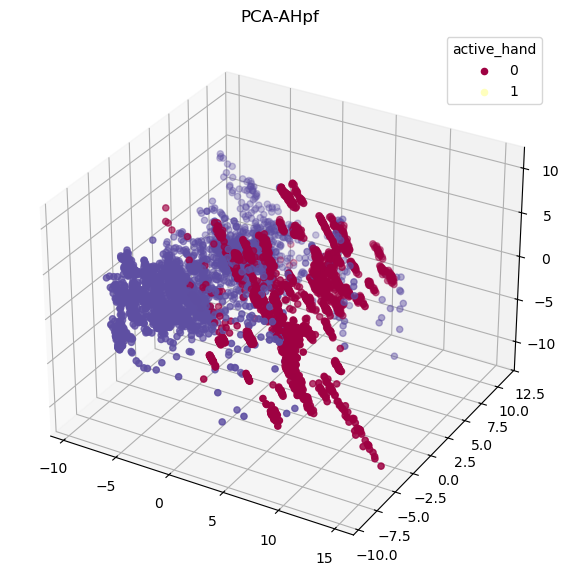

In [30]:
ah_frm_PCA = PCA(n_components=3)
visualize(ah_frm_PCA, PH3_AH_FRM_PCA_df, label_col=sup.active_hand_col, title=f"PCA-{sup.DATA_AH_PF}", reducer_name=sup.PH3_REDUCER_NAME_PCA)

In [31]:
ah_frm_big_PCA = PCA(n_components=40)
ah_frm_big_PCA.fit(PH3_AH_FRM_PCA_df)
ah_frm_big_PCA.explained_variance_ratio_

array([3.85766333e-01, 2.95484035e-01, 1.42053090e-01, 5.53237953e-02,
       4.09776654e-02, 2.69595678e-02, 2.11043688e-02, 1.19644315e-02,
       5.55005648e-03, 4.35685850e-03, 2.15878187e-03, 1.49008409e-03,
       1.40914712e-03, 9.85874910e-04, 6.91168539e-04, 5.68136727e-04,
       5.21545720e-04, 4.63964657e-04, 4.19161665e-04, 3.63637215e-04,
       3.32522044e-04, 2.29181641e-04, 1.63335201e-04, 1.24321266e-04,
       1.18188046e-04, 1.08259797e-04, 6.38201858e-05, 6.01737852e-05,
       3.96205280e-05, 2.72503606e-05, 2.16003570e-05, 1.70296192e-05,
       1.57528177e-05, 1.21436400e-05, 9.52573705e-06, 8.36508284e-06,
       7.44231530e-06, 5.32843833e-06, 4.67893010e-06, 2.99452821e-06])

#### Writeout

In [32]:
writeout(PCA, sup.PH3_REDUCER_NAME_PCA, PH3_AH_FRM_PCA_df, [sup.active_hand_col], f"{sup.DATA_AH_PF}")

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/pca/ does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/

### Sign Recognition

#### Per frame

##### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution


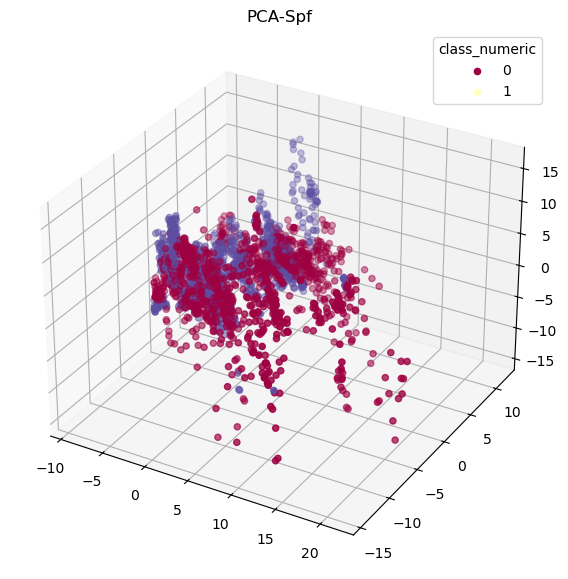

In [33]:
s_frm_PCA = PCA(n_components=3)
visualize(s_frm_PCA, PH3_S_FRM_PCA_df, label_col=sup.class_numeric_column, title=f"PCA-{sup.DATA_S_PF}", reducer_name=sup.PH3_REDUCER_NAME_PCA)

In [34]:
s_frm_big_PCA = PCA(n_components=40)
s_frm_big_PCA.fit(PH3_S_FRM_PCA_df)
s_frm_big_PCA.explained_variance_ratio_

array([3.64714295e-01, 2.90650598e-01, 1.63567618e-01, 5.15108514e-02,
       3.48797229e-02, 3.05463030e-02, 2.39035862e-02, 1.68662078e-02,
       6.36998749e-03, 4.44134228e-03, 2.93976277e-03, 2.61721583e-03,
       1.29657708e-03, 1.07158747e-03, 7.56513820e-04, 5.72041191e-04,
       5.42728250e-04, 4.76025287e-04, 3.71627695e-04, 3.63208732e-04,
       2.97427166e-04, 2.21584314e-04, 1.86510592e-04, 1.81682558e-04,
       1.22734120e-04, 1.12500756e-04, 9.64617915e-05, 7.38899082e-05,
       4.27446297e-05, 4.12497192e-05, 3.67733879e-05, 2.65739572e-05,
       1.86121048e-05, 1.52044763e-05, 1.25406964e-05, 1.12129522e-05,
       8.37738845e-06, 5.99507929e-06, 5.14430403e-06, 4.23834750e-06])

##### Writeout

In [35]:
writeout(PCA, sup.PH3_REDUCER_NAME_PCA, PH3_S_FRM_PCA_df, [sup.class_numeric_column], f"{sup.DATA_S_PF}")

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Contin

#### Per video

##### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution


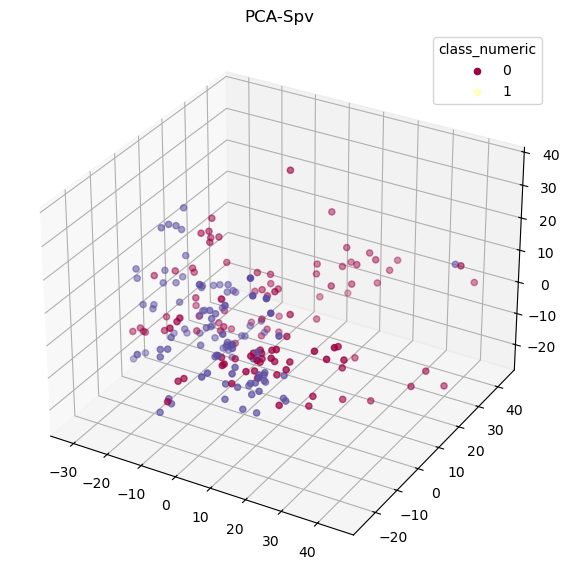

In [36]:
s_vid_PCA = PCA(n_components=3)
visualize(s_vid_PCA, PH3_S_VID_PCA_df, label_col=sup.class_numeric_column, title=f"PCA-{sup.DATA_S_PV}", reducer_name=sup.PH3_REDUCER_NAME_PCA)

In [37]:
s_vid_big_PCA = PCA(n_components=40)
s_vid_big_PCA.fit(PH3_S_VID_PCA_df)
s_vid_big_PCA.explained_variance_ratio_

array([0.3267487 , 0.25599451, 0.12515167, 0.05378849, 0.04084827,
       0.02919451, 0.02671912, 0.02106549, 0.01494339, 0.01280389,
       0.00861839, 0.0074834 , 0.00727665, 0.00576353, 0.00535445,
       0.00450245, 0.00441478, 0.00412195, 0.00352931, 0.00324054,
       0.00276142, 0.00243412, 0.00222088, 0.00200333, 0.00196721,
       0.00173817, 0.00172703, 0.00162798, 0.00151997, 0.00142599,
       0.00120403, 0.00113139, 0.00103426, 0.00095627, 0.00092033,
       0.00085512, 0.00083626, 0.00073337, 0.00070002, 0.0006296 ])

##### Writeout

In [38]:
writeout(PCA, sup.PH3_REDUCER_NAME_PCA, PH3_S_VID_PCA_df, sup.class_numeric_column, f"{sup.DATA_S_PV}")

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/pca/ exists. Contin

## Kernel PCA

In [39]:
PH3_AH_FRM_KPCA_df = PH3_AH_FRM_std_df.copy()
PH3_S_FRM_KPCA_df = PH3_S_FRM_std_df.copy()
PH3_S_VID_KPCA_df = PH3_S_VID_std_df.copy()

### Active hand detection

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/kpca/poly does not exist. Creating it and continuing withexecution


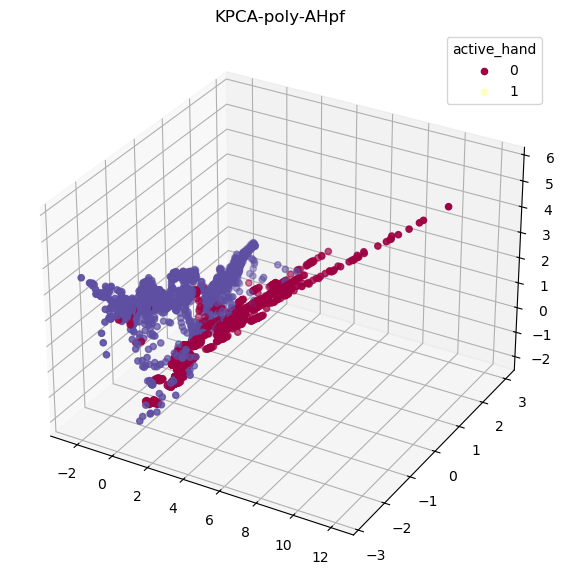

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/kpca/rbf does not exist. Creating it and continuing withexecution


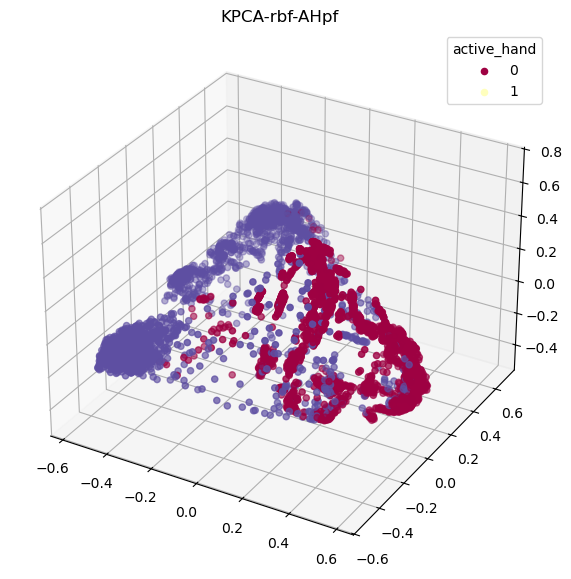

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/kpca/sigmoid does not exist. Creating it and continuing withexecution


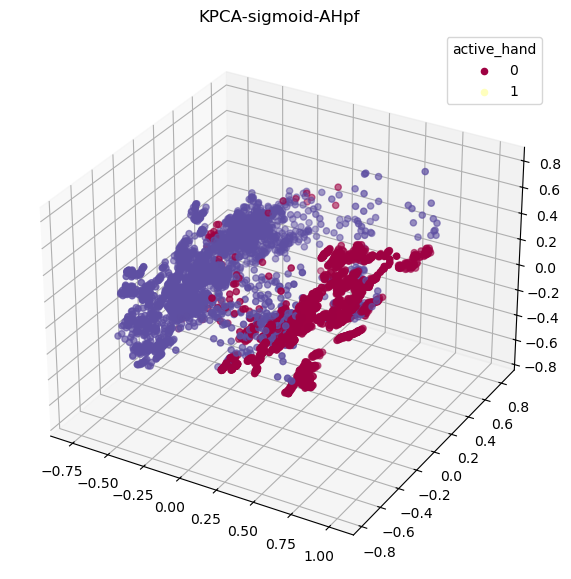

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/kpca/cosine does not exist. Creating it and continuing withexecution


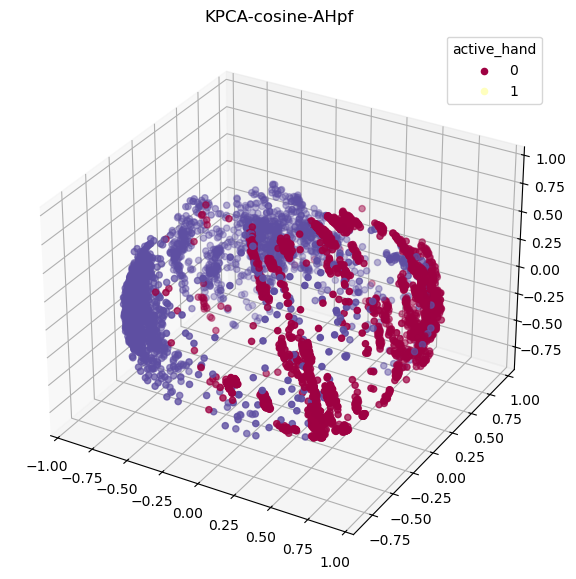

In [40]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  ah_frm_KPCA = KernelPCA(kernel=kernel_name, n_components=3)
  visualize(ah_frm_KPCA, PH3_AH_FRM_KPCA_df, label_col=sup.active_hand_col, title=f"KPCA-{kernel_name}-{sup.DATA_AH_PF}", reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

#### Writeout

In [41]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(KernelPCA, sup.PH3_REDUCER_NAME_KPCA, PH3_AH_FRM_KPCA_df, [sup.active_hand_col], f"{sup.DATA_AH_PF}", kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/kpca/poly does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/kpca/poly does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Direct

### Sign Recognition

#### Per frame

##### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution


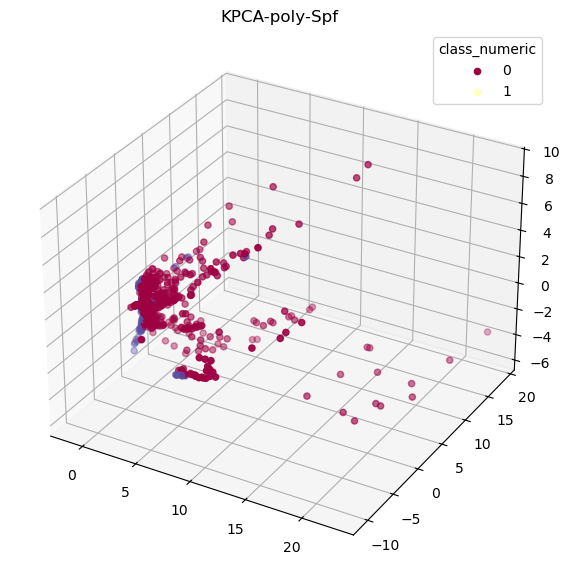

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/kpca/rbf exists. Continuing with execution


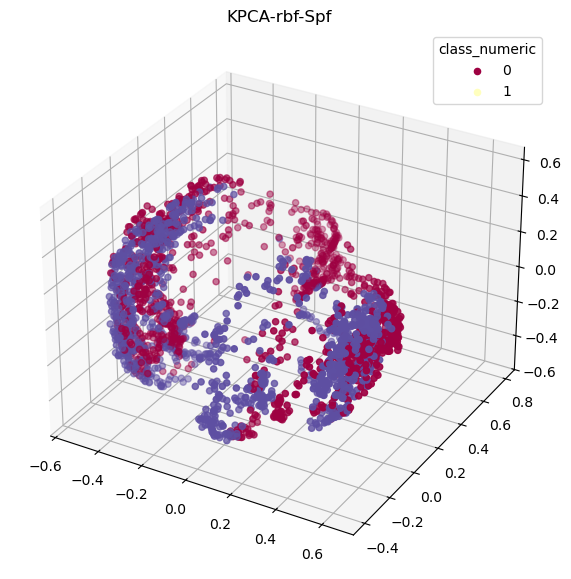

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/kpca/sigmoid exists. Continuing with execution


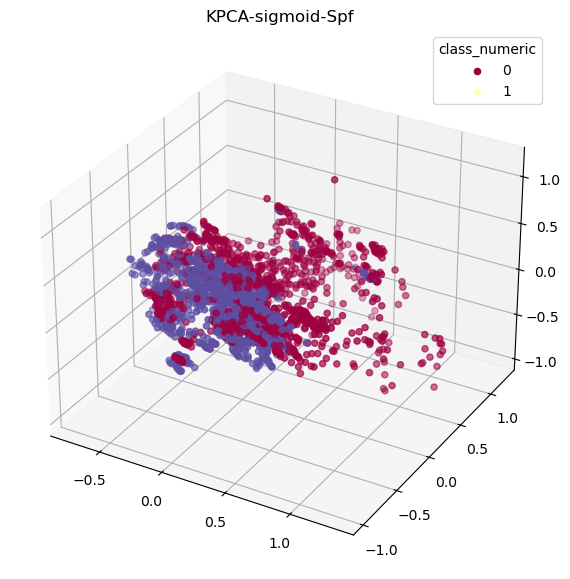

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/kpca/cosine exists. Continuing with execution


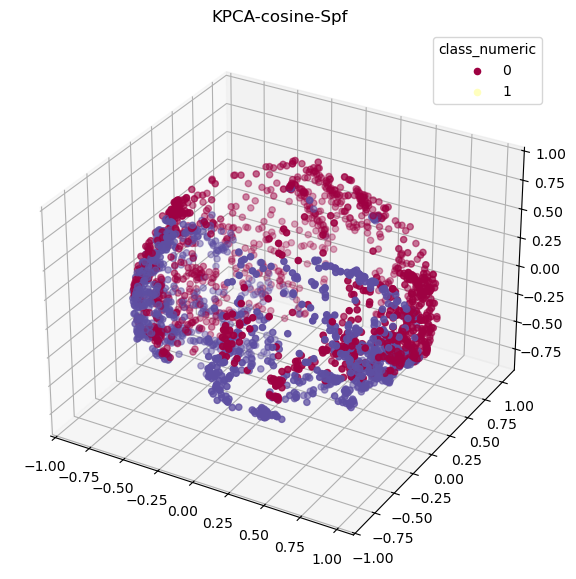

In [42]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  s_frm_KPCA = KernelPCA(kernel=kernel_name, n_components=3)
  visualize(s_frm_KPCA, PH3_S_FRM_KPCA_df, label_col=sup.class_numeric_column, title=f"KPCA-{kernel_name}-{sup.DATA_S_PF}", reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

##### Writeout

In [43]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(KernelPCA, sup.PH3_REDUCER_NAME_KPCA, PH3_S_FRM_KPCA_df, [sup.class_numeric_column], f"{sup.DATA_S_PF}", kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/tw

#### Per video

##### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution


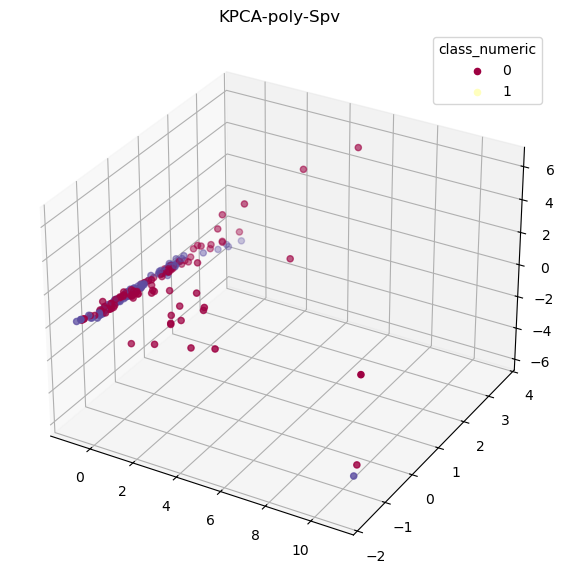

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/kpca/rbf exists. Continuing with execution


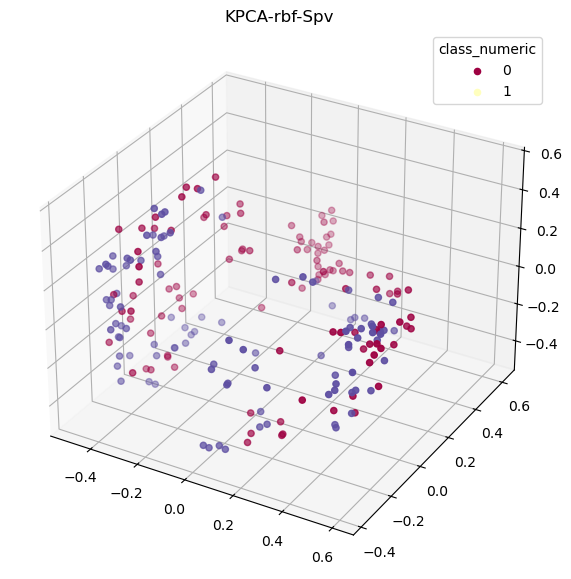

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/kpca/sigmoid exists. Continuing with execution


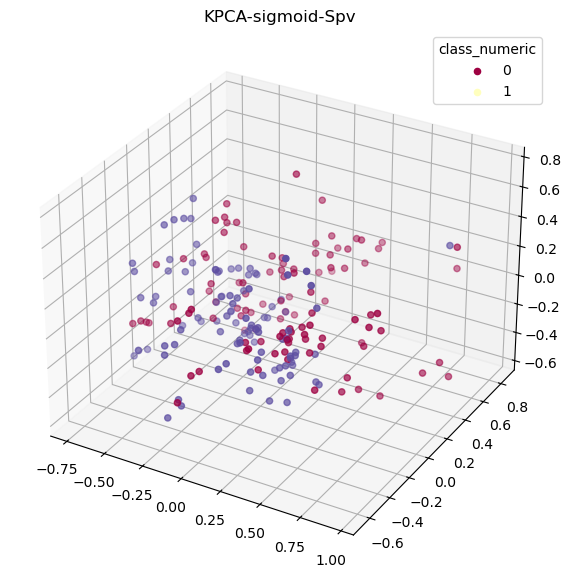

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/kpca/cosine exists. Continuing with execution


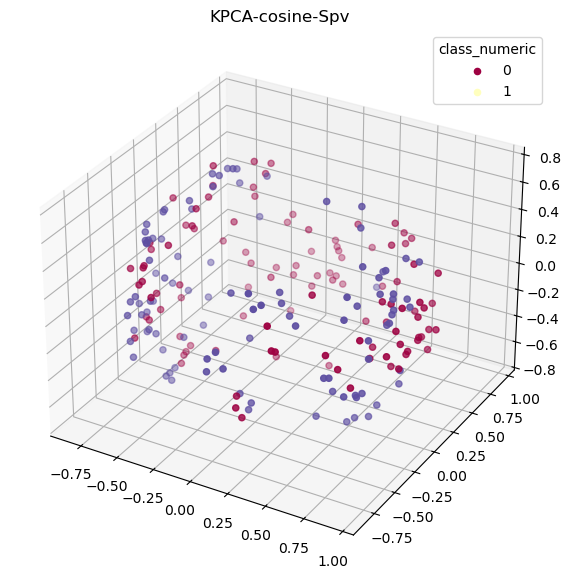

In [44]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  s_vid_KPCA = KernelPCA(kernel=kernel_name, n_components=3)
  visualize(s_vid_KPCA, PH3_S_VID_KPCA_df, label_col=sup.class_numeric_column, title=f"KPCA-{kernel_name}-{sup.DATA_S_PV}", reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

##### Writeout

In [45]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(KernelPCA, sup.PH3_REDUCER_NAME_KPCA, PH3_S_VID_PCA_df, sup.class_numeric_column, f"{sup.DATA_S_PV}", kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/tw

## UMAP

In [46]:
PH3_AH_FRM_UMAP_df = PH3_AH_FRM_std_df.copy()
PH3_S_FRM_UMAP_df = PH3_S_FRM_std_df.copy()
PH3_S_VID_UMAP_df = PH3_S_VID_std_df.copy()

### Active hand detection

#### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/umap/ does not exist. Creating it and continuing withexecution


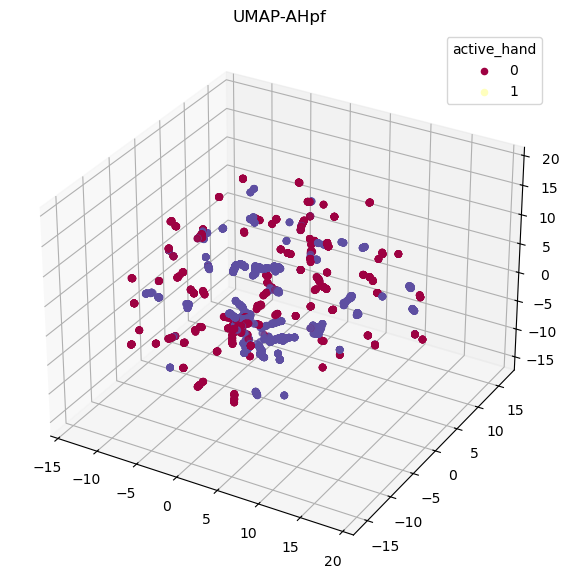

In [47]:
ah_frm_UMAP = umap.UMAP(n_components=3, random_state=42)
visualize(ah_frm_UMAP, PH3_AH_FRM_UMAP_df, label_col=sup.active_hand_col, title=f"UMAP-{sup.DATA_AH_PF}", reducer_name=sup.PH3_REDUCER_NAME_UMAP)

#### Writeout

In [48]:
writeout(umap.UMAP, sup.PH3_REDUCER_NAME_UMAP, PH3_AH_FRM_UMAP_df, [sup.active_hand_col], f"{sup.DATA_AH_PF}")

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ does not exist. Creating it and continuing withexecution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


### Sign Recognition

#### Per frame

##### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


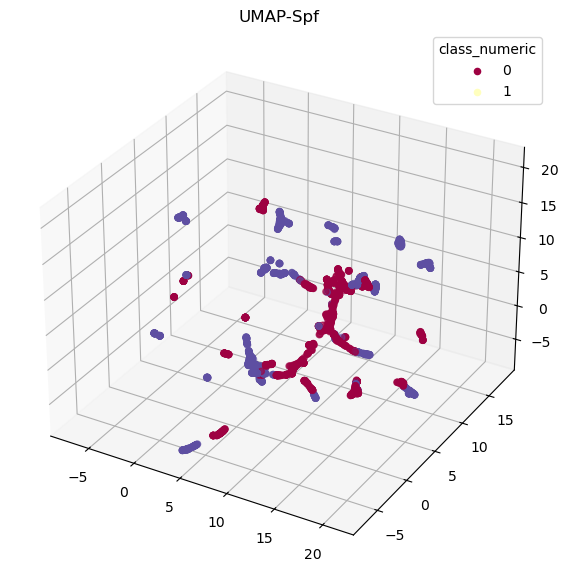

In [49]:
s_frm_UMAP = umap.UMAP(n_components=3, random_state=42)
visualize(s_frm_UMAP, PH3_S_FRM_UMAP_df, label_col=sup.class_numeric_column, title=f"UMAP-{sup.DATA_S_PF}", reducer_name=sup.PH3_REDUCER_NAME_UMAP)

##### Writeout

In [50]:
writeout(umap.UMAP, sup.PH3_REDUCER_NAME_UMAP, PH3_S_FRM_UMAP_df, [sup.class_numeric_column], f"{sup.DATA_S_PF}")

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


#### Per Video

##### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


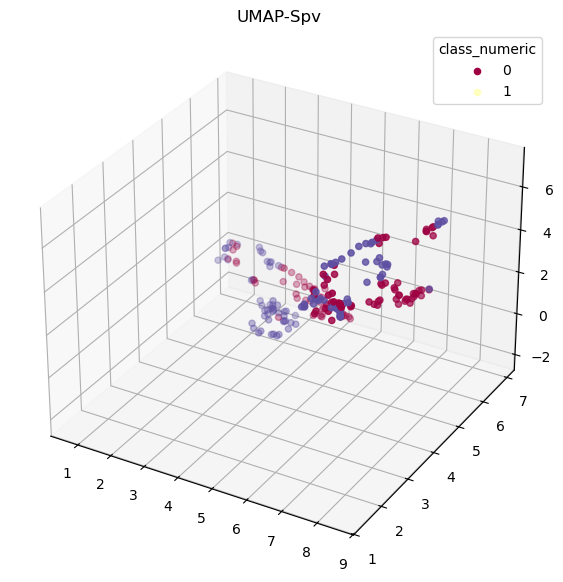

In [51]:
s_vid_UMAP = umap.UMAP(n_components=3, random_state=42)
visualize(s_vid_UMAP, PH3_S_VID_UMAP_df, label_col=sup.class_numeric_column, title=f"UMAP-{sup.DATA_S_PV}", reducer_name=sup.PH3_REDUCER_NAME_UMAP)

##### Writeout

In [52]:
writeout(umap.UMAP, sup.PH3_REDUCER_NAME_UMAP, PH3_S_VID_UMAP_df, sup.class_numeric_column, f"{sup.DATA_S_PV}")

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/wo2/reduce/umap/ exists. Continuing with execution
